# Underfit vs Overfit 

# sklearn.preprocessing.PolynomialFeatures

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [2]:
PolynomialFeatures?

In [3]:
x = np.arange(6).reshape(3, 2)
x

array([[0, 1],
       [2, 3],
       [4, 5]])

In [4]:
poly = PolynomialFeatures(2)
poly.fit_transform(x)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [5]:
poly = PolynomialFeatures(2, include_bias=False)
poly.fit_transform(x)

array([[ 0.,  1.,  0.,  0.,  1.],
       [ 2.,  3.,  4.,  6.,  9.],
       [ 4.,  5., 16., 20., 25.]])

# Underfit vs Overfit Example

http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py

In [6]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [7]:
# make directory if not exist
if not os.path.isdir("img"):
    os.mkdir('img')

In [8]:
# target function
def true_func(x):
    return np.cos(1.5 * np.pi * x)

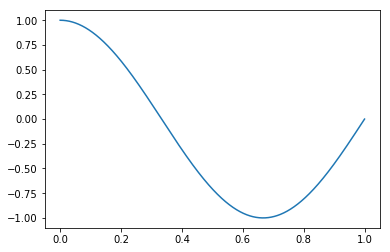

In [9]:
x = np.linspace(0.,1.,1000)
y = true_func(x)
plt.plot(x,y)

In [10]:
# generate data
def generate_data(n_samples):
    np.random.seed(0)
    x = np.sort( np.random.uniform(0.,1.,(n_samples,1)) )
    y = true_func(x) + np.random.normal(0.,1.,(n_samples,1)) * 0.1
    return x, y

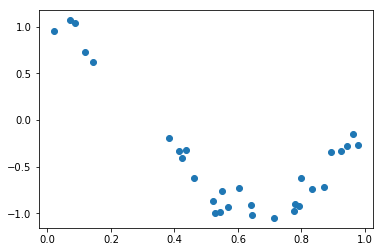

In [11]:
x, y = generate_data(30)
plt.plot(x,y,'o')

In [12]:
# fit and draw
def fit_and_draw(x, y, degree, ax):
    # Fit data
    model = make_pipeline(PolynomialFeatures(degree=degree,include_bias=False),
                          LinearRegression())
    model.fit(x, y)
    
    # Evaluate the model using cross validation
    scores = cross_val_score(model, x, y,
                             scoring="neg_mean_squared_error", cv=10)

    # Draw figure
    xx = np.linspace(0, 1, 100)[:, np.newaxis]
    yy_true = true_func(xx) 
    yy_predict = model.predict(xx)
    ax.scatter(x, y, edgecolor='b', s=20, label="Samples")
    ax.plot(xx, yy_true, label="True")
    ax.plot(xx, yy_predict, label="Predict")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim((0, 1))
    ax.set_ylim((-2, 2))
    ax.legend(loc="best")
    ax.set_title("Model Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degree, -scores.mean(), scores.std()))

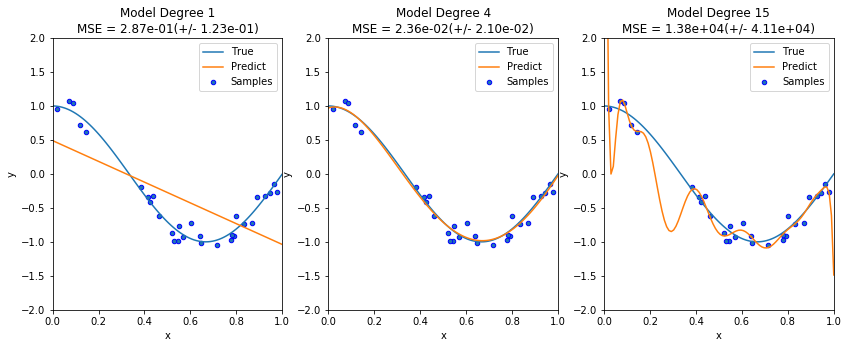

In [13]:
# run
if __name__ == '__main__':
    n_samples = 30
    degrees = [1,4,15]
    
    x, y = generate_data(n_samples)
    
    plt.figure(figsize=(14, 5))
    for idx, degree in enumerate(degrees):
        ax = plt.subplot(1, len(degrees), idx + 1)
        fit_and_draw(x, y, degree=degree, ax=ax) 
    plt.savefig("img/Underfit vs Overfit.png") 